# 多分类：新闻
- 上面那个电影评价是一个二分类的问题
- 这个路透社的新闻是一个多分类的问题

In [1]:
from keras.datasets import reuters
import warnings
warnings.filterwarnings('ignore')

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 1s 0us/step


In [3]:
train_data.shape

(8982,)

In [4]:
test_data.shape

(2246,)

In [8]:
# 和那个电影数据集一样，每个样本都是一个数字序列，每个数字代表一个单词
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [9]:
# 将数字序列转换为单词
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

565248/550378 [==============================] - 0s 1us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [11]:
# 将原始的输入变成one-hot编码，一个稀疏矩阵
# 将原始的训练数据集转换成一个8982x10000的稀疏矩阵
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train.shape

(8982, 10000)

In [13]:
# 将标签转换成one-hot编码
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
one_hot_train_labels[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 

In [14]:
one_hot_train_labels.shape

(8982, 46)

In [15]:
# 构建模型
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

2022-04-10 17:46:40.366690: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-10 17:46:40.366763: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-10 17:46:40.366810: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (yy): /proc/driver/nvidia/version does not exist
2022-04-10 17:46:40.367254: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
# 编译模型
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
# 将训练数据集分成训练集和验证集
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [18]:
# 训练模型
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2022-04-10 17:48:28.321461: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 319280000 exceeds 10% of free system memory.


16/16 [==============================] - 3s 105ms/step - loss: 2.7916 - accuracy: 0.5373 - val_loss: 1.8562 - val_accuracy: 0.6850
Epoch 2/20
16/16 [==============================] - 1s 85ms/step - loss: 1.4542 - accuracy: 0.7139 - val_loss: 1.3390 - val_accuracy: 0.7080
Epoch 3/20
16/16 [==============================] - 1s 86ms/step - loss: 1.0473 - accuracy: 0.7744 - val_loss: 1.1451 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 1s 86ms/step - loss: 0.8155 - accuracy: 0.8269 - val_loss: 1.0370 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 1s 88ms/step - loss: 0.6544 - accuracy: 0.8617 - val_loss: 0.9744 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 1s 87ms/step - loss: 0.5202 - accuracy: 0.8926 - val_loss: 0.9298 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 1s 91ms/step - loss: 0.4220 - accuracy: 0.9119 - val_loss: 0.8990 - val_accuracy: 0.8110
Epoch 8/20
16/16 [=====

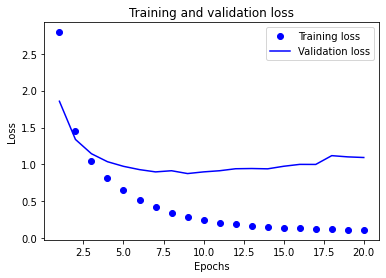

In [19]:
# 绘制训练损失和验证损失
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

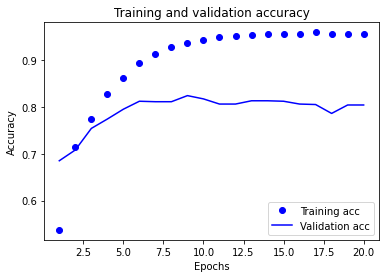

In [20]:
# 绘制训练精度和验证精度
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
# 评估一下这个模型的表现
# 模型的表现的基线就是瞎猜的结果，如果你的模型还没有超过这个基线，那么这个模型也就没有实际意义
# 对于一个二分类的问题，模型的基线是准确率为0.5，也就是猜对了一般
# 对于这个多分类问题，这个模型的基线计算方法如下
# 可以看出瞎猜的结果准确率大概为19%
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
# 瞎猜猜对的结果
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.188780053428317